# Connecting to Google Drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [39]:
import datetime
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# EDA

## Dataset Explanation

1. Title: marketing_campaign Dataset

2. Sources: https://www.kaggle.com/rodsaldanha/arketing-campaign

5. Number of Instances: 2240

6. Number of Attributes: 26

7. Attribute information:
   # Customer Information:
   1 - ID : Customer unique ID

   2 - Year Birth : Customer's birth year

   3 - Education : Education qualification of customer

   4 - Marital Status : Marital status of customer

   5 - Income : Customer's yearly household income

   6 - Kidhome : Number of children in customer's household

   7 - Teenhome : Number of teen in customer's household

   8 - Dt_customer : Date of customer's enrollment with the company

   9 - Recency : number of days since customer's last purchase

  # Products Spent Informations
  Amount spent on different products in last 2 years:
  
  10 - MntWines

  11 - MntFruits

  12 - MntMeatProducts

  13 - MntFishProducts

  14 - MntSweetProducts

  15 - MntGoldProds

   # Place
  16 - NumWebPurchases

  17 - NumCatalogPurchases

  18 - NumStorePurchases

  19 - NumWebVisitsMonth

  # Promotion
  20 - NumDealsPurchases

  21 - AcceptedCmp1

  22 - AcceptedCmp2

  23 - AcceptedCmp3

  24 - AcceptedCmp4

  25 - AcceptedCmp5

  26 - Response

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Microcredential/Bank_Marketing/marketing_dataset.csv', sep='\t')
df.shape

(2240, 29)

In [3]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1237,9757,1972,Graduation,Together,84906.0,0,0,04-10-2013,98,997,15,414,99,30,76,1,5,6,12,2,0,1,1,0,1,0,3,11,0
2007,405,1964,Graduation,Divorced,41638.0,0,1,13-02-2013,68,315,0,31,4,0,91,4,5,5,3,8,1,0,0,0,0,0,3,11,0
2170,9362,1965,Graduation,Single,69263.0,0,1,05-03-2014,14,492,5,32,13,5,21,1,9,1,7,6,0,1,0,0,0,0,3,11,0
1346,10390,1959,2n Cycle,Married,26887.0,0,1,10-02-2013,27,6,7,4,3,4,6,1,1,0,3,6,0,0,0,0,0,0,3,11,0
1467,7521,1952,Graduation,Together,83844.0,0,0,12-05-2013,57,901,31,345,75,31,191,1,4,4,11,1,0,0,1,0,0,0,3,11,0
199,3182,1973,PhD,Single,46854.0,1,1,31-03-2014,81,96,1,79,7,1,79,6,5,1,3,8,1,0,0,0,0,0,3,11,1
361,9336,1969,PhD,Widow,62187.0,0,1,22-03-2014,38,512,0,83,0,0,41,3,6,2,10,4,0,0,0,0,0,0,3,11,0
769,8786,1956,Master,Married,62058.0,0,1,26-05-2013,52,301,7,74,10,0,58,4,6,1,7,6,0,0,0,0,0,0,3,11,0
84,535,1987,Graduation,Divorced,81361.0,0,0,25-02-2014,18,163,23,424,27,65,76,1,3,10,13,1,0,0,0,0,0,0,3,11,0
647,3376,1970,Master,Divorced,55282.0,1,0,13-12-2013,9,125,6,73,8,4,19,1,3,1,6,4,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Berdasarkan df.info() diatas, dapat dikatakan:
1. Terdapat missing value pada column income, dimana nilai non-null hanya ada 2216
2. Tipe data Dt_customer berupa categorical dan bukan date
3. Marital status masih berupa categorical

### Cleaning Data

#### Menghilangkan Missing Value

In [5]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [6]:
# Drop dataframe yang memiliki nilai NaN
df.dropna(inplace=True)
df.shape

(2216, 29)

#### Membuat Feature Customer_For
Feature jumlah hari semenjak customer terdaftar di database berdasarkan "Dt_Customer"

In [7]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []

for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# Tanggal enrolment customer terbaru dan terlama di database
print("Enrolment date terbaru :",max(dates))
print("Enrolment date terlama: ",min(dates))

Enrolment date terbaru : 2014-12-06
Enrolment date terlama:  2012-01-08


In [8]:
days = []
d1 = max(dates) # tanggal terbaru
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days


In [22]:
df["Customer_For"] = df["Customer_For"].dt.days

In [23]:
df['Customer_For']

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Customer_For, Length: 2216, dtype: int64

#### Explore Categorical Marital dan Education

In [24]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### Data Pre-Processing

#### Feature Engineering

##### Age

In [25]:
# Membuat feature Age berdasarkan feature "Year_Birth"
df["Age"] = 2021 - df["Year_Birth"] #2021 merupakan tahun saat ini

In [26]:
df['Age']

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2216, dtype: int64

##### Total Spending

In [28]:
# Membuat feature Spent berdasarkan semua column yang termasuk Product Spent Information
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

df['Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

##### Living_With
Mengubah marital status menjadi feature binary, yaitu:
1. Partner : Married, Together
2. Alone : Absurd, Widow, YOLO, Divorced, Single

In [30]:
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner",
                                                      "Together":"Partner",
                                                      "Absurd":"Alone",
                                                      "Widow":"Alone",
                                                      "YOLO":"Alone",
                                                      "Divorced":"Alone",
                                                      "Single":"Alone",})

In [31]:
df['Living_With'].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

##### Children

In [32]:
# Membuat feature children dengan cara menjumlahkan feature kidhome dan teenhome

df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

##### Family_Size

In [33]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]
df["Family_Size"]

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

##### Is_Parent

In [34]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["Is_Parent"]

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2216, dtype: int64

##### Education
Mengubah education level menjadi 3 kategori:
1. Undergraduate : Basic, 2n Cycle
2. Graduate : Graduation
3. Postgraduate : Master, PhD

In [35]:
df["Education"] = df["Education"].replace({"Basic":"Undergraduate",
                                           "2n Cycle":"Undergraduate",
                                           "Graduation":"Graduate",
                                           "Master":"Postgraduate",
                                           "PhD":"Postgraduate"})

df["Education"]

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education, Length: 2216, dtype: object

##### Rename Column

In [36]:
df = df.rename(columns={"MntWines": "Wines",
                        "MntFruits":"Fruits",
                        "MntMeatProducts":"Meat",
                        "MntFishProducts":"Fish",
                        "MntSweetProducts":"Sweets",
                        "MntGoldProds":"Gold"})

##### Drop Column yang sudah tidak **diperlukan**

In [37]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,40,422,Partner,1,3,1


### Exploratory Data Analysis

In [38]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,512.006318,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,513.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,686.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1063.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

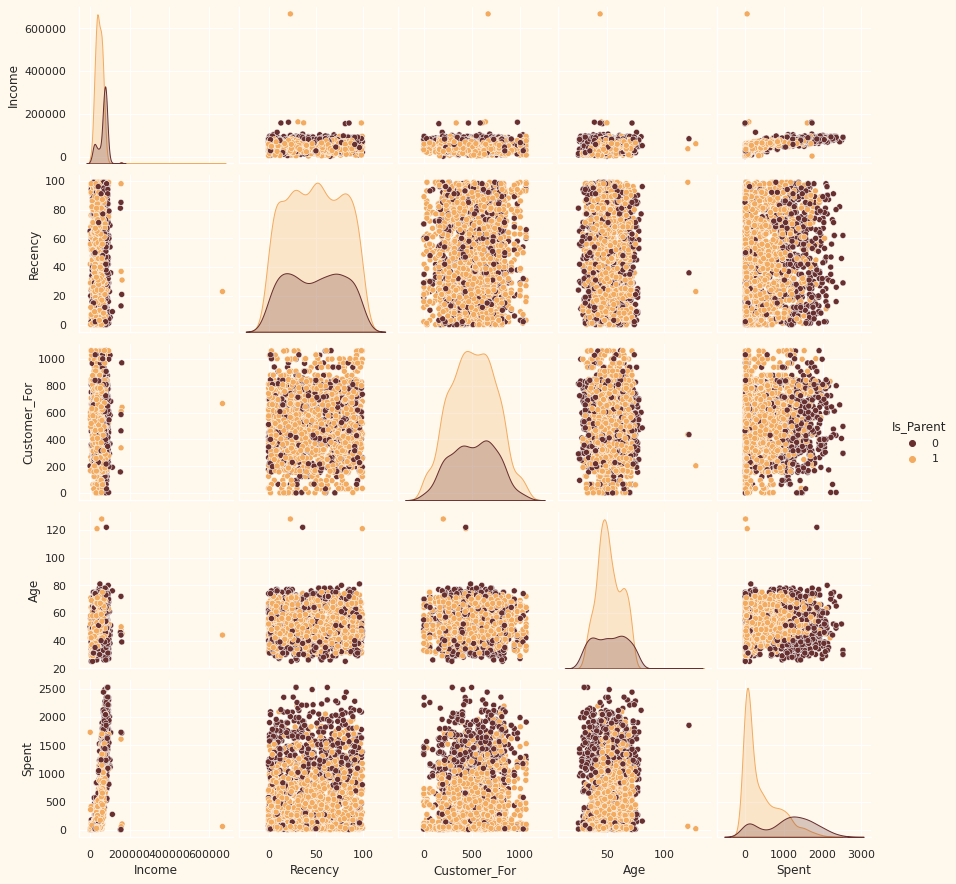

In [41]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting  features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent", palette= (["#682F2F","#F3AB60"]))

plt.show()

#### Age

Text(0.5, 1.0, 'Age Frequency')

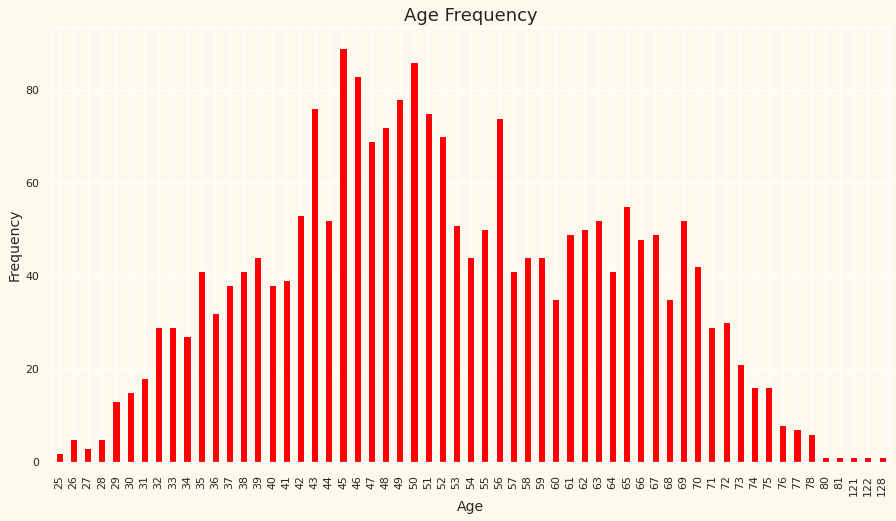

In [43]:
df['Age'].value_counts().sort_index().plot(kind = 'bar', figsize =(15,8), colormap='hsv')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title("Age Frequency",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


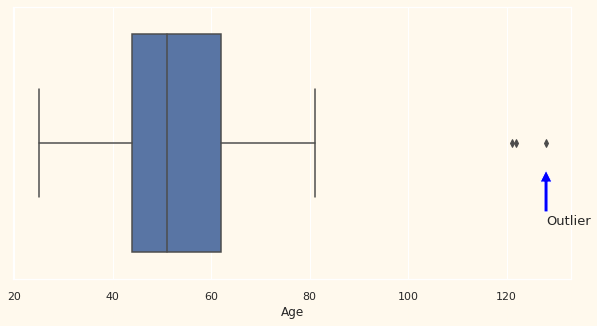

In [44]:
col = 'Age'
plt.figure(figsize = (10, 5))
sns.boxplot(df[col])
plt.annotate('Outlier', (df[col].describe()['max'],0.1), xytext = (df[col].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Income'].describe()['75%'] - df['Income'].describe()['25%']

Berdasarkan data diatas dapat dilihat terdapat beberapa outliers pada data age, dimana nilainya mencapai 128

In [46]:
# Fungsi untuk mendeteksi outlier
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [47]:
detect_outliers(df, 'Age')

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
192,Undergraduate,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,436,121,65,Alone,1,2,1
239,Undergraduate,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,203,128,22,Alone,1,2,1
339,Postgraduate,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,436,122,1853,Partner,0,2,0


In [49]:
# Drop data outliers pada column age
print('Shape awal: {}'.format(df.shape))

df = df[(df["Age"] < 90)]

print('Shape akhir: {}'.format(df.shape))

(2213, 30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


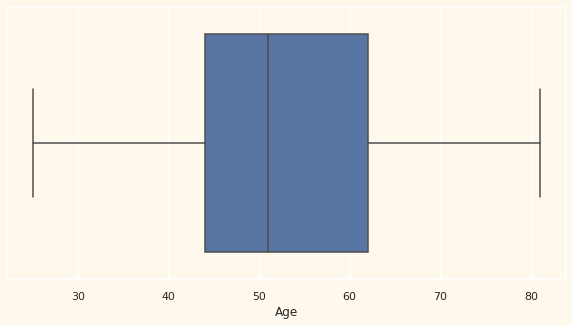

In [52]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

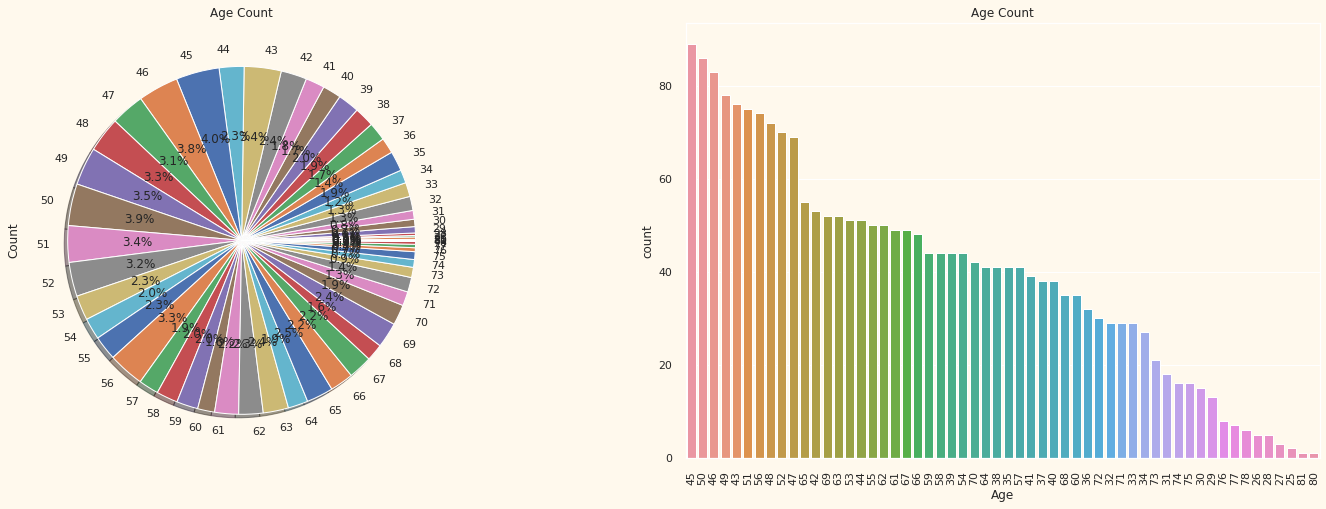

In [62]:
f,ax = plt.subplots(1,2,figsize=(25,8))
df['Age'].value_counts().sort_index().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Age Count')
ax[0].set_ylabel('Count')
sns.countplot('Age', data=df ,ax=ax[1], order = df['Age'].value_counts().index)
ax[1].set_title('Age Count')
plt.xticks(rotation=90)

#### Income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


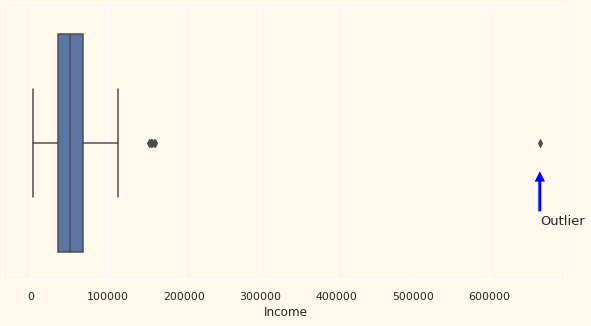

In [54]:
col = 'Income'
plt.figure(figsize = (10, 5))
sns.boxplot(df[col])
plt.annotate('Outlier', (df[col].describe()['max'],0.1), xytext = (df[col].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Income'].describe()['75%'] - df['Income'].describe()['25%']

In [55]:
detect_outliers(df, 'Income')

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
164,Postgraduate,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,337,48,1608,Partner,1,3,1
617,Postgraduate,162397.0,1,1,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,640,45,107,Partner,2,4,1
655,Graduate,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,157,46,6,Alone,0,1,0
687,Postgraduate,160803.0,0,0,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,972,39,1717,Partner,0,2,0
1300,Postgraduate,157733.0,1,0,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,609,50,59,Partner,1,3,1
1653,Graduate,157146.0,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,586,44,1730,Partner,0,2,0
2132,Postgraduate,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,464,72,8,Partner,0,2,0
2233,Graduate,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,668,44,62,Partner,1,3,1


In [56]:
print('Shape awal: {}'.format(df.shape))

df = df[(df["Income"]<600000)]

print('Shape akhir: {}'.format(df.shape))

Shape awal: (2213, 30)
Shape akhir: (2212, 30)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


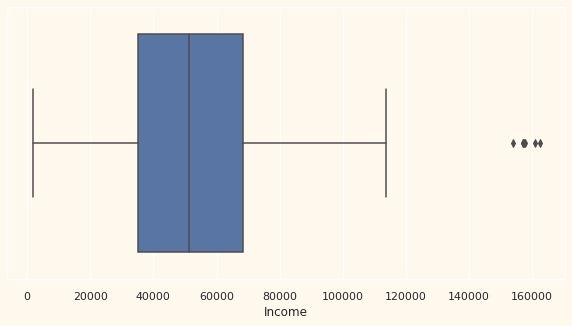

In [58]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Income'])

#### Recency

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


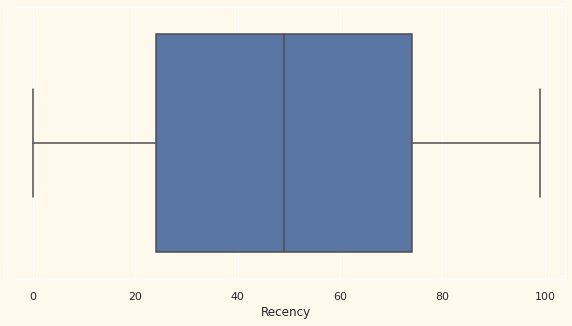

In [66]:
col = 'Recency'
plt.figure(figsize = (10, 5))
sns.boxplot(df[col])

#### Customer_For

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


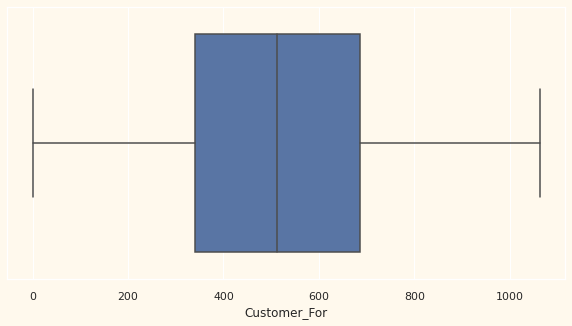

In [69]:
col = 'Customer_For'
plt.figure(figsize = (10, 5))
sns.boxplot(df[col])

#### Spent

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


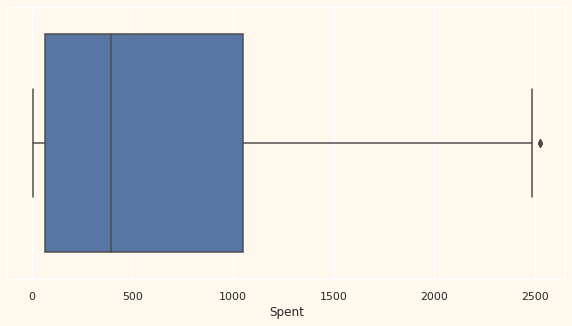

In [71]:
col = 'Spent'
plt.figure(figsize = (10, 5))
sns.boxplot(df[col])

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

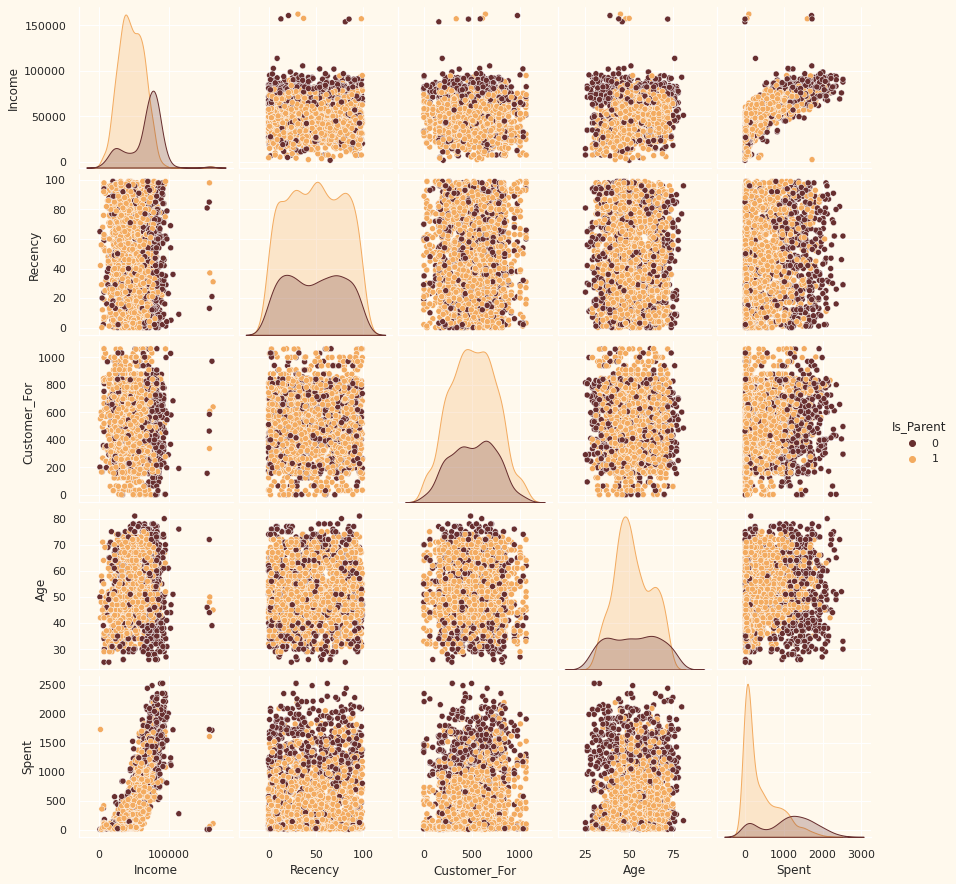

In [74]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting  features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent", palette= (["#682F2F","#F3AB60"]))

plt.show()

#### Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Education Count')

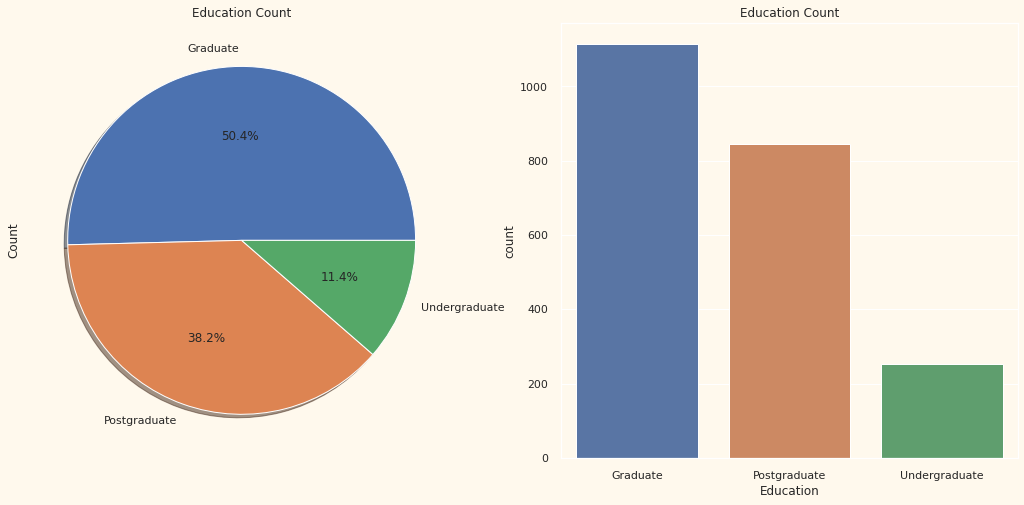

In [77]:
col = 'Education'

f,ax = plt.subplots(1,2,figsize=(18,8))
df[col].value_counts().sort_index().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('{} Count'.format(col))
ax[0].set_ylabel('Count')
sns.countplot(col, data=df ,ax=ax[1], order = df[col].value_counts().index)
ax[1].set_title('{} Count'.format(col))

#### Data Correlation

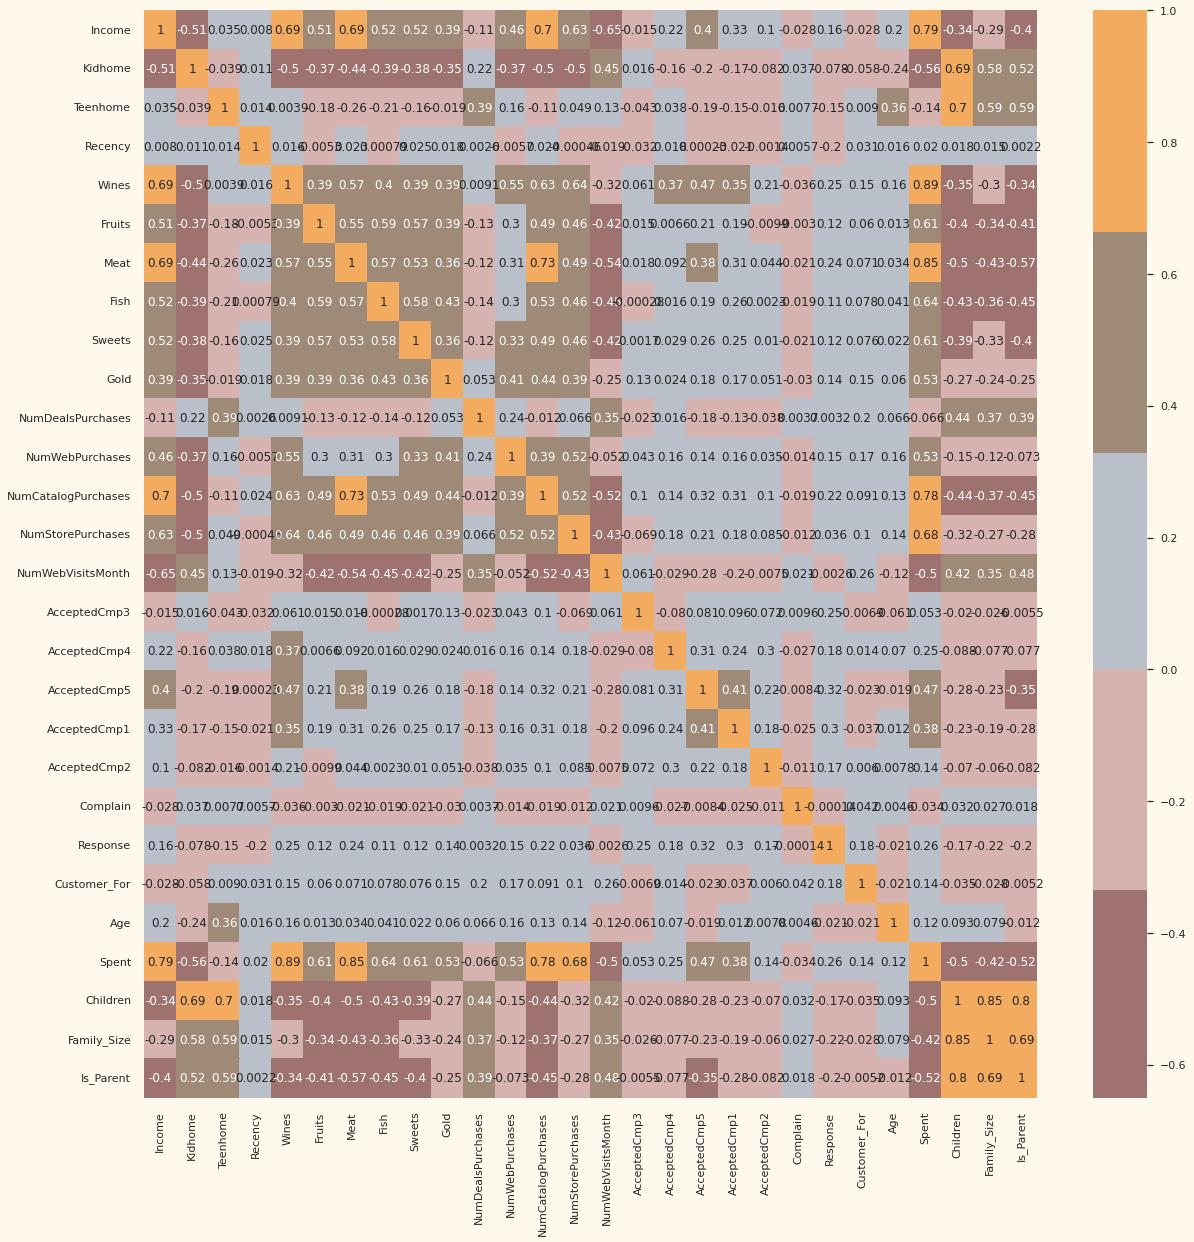

In [79]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [94]:
def plot_category(colum, feature, figsize=None):
    A_count = df[df['Is_Parent'] == 0].groupby([feature]).size()
    B_count = df[df['Is_Parent'] == 1].groupby([feature]).size()
    labels = A_count.index

    x = np.arange(len(labels)) # the label locations
    width = 0.7  # the width of the bars

    if figsize:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = plt.subplots()
    rects1 = ax.bar(x-width/3, round(A_count*100/data.groupby([feature]).size(), 2), 
                    width/5, label='A')
    rects2 = ax.bar(x-width/8, round(B_count*100/data.groupby([feature]).size(), 2), 
                    width/5, label='B')

    ax.set_ylabel('Count')
    ax.set_title('Based on %s'%feature)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=80)
    ax.legend(loc=0, bbox_to_anchor=(1, 1));

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)
    ax.bar_label(rects3, padding=1)
    ax.bar_label(rects4, padding=1)

    fig.tight_layout()
    plt.show()
    
def plot_numerical(feature, figsize=None):
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(df[df['Is_Parent'] == 0][feature])
    sns.kdeplot(df[df['Is_Parent'] == 1][feature])

    fig.legend(labels=['Segmentation 0', 'Segmentation 1'])
    plt.title('Based on %s'%feature)
    plt.show()
    
def plot_pie(feature):
    plot_data = df.groupby([feature, 'Is_Parent'])[feature].agg({'count'}).reset_index()

    fig = px.sunburst(plot_data, path = [feature, 'Is_Parent'], values = 'count', color = feature, 
                      title = 'Affect of %s on Feature Is_Parent'%feature, width = 600, height = 600)

    fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', 
                      title_font_size = 22, title_x = 0.5)

    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [95]:
for feature in ['Education', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'Complain', 'Response']:
    plot_pie(feature)